# Ali Morajabi - HW1 - NNDL - 610300104
<hr><hr><hr>

# Required Libraries

In [1]:
import random
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import matplotlib.pyplot as plt

# Adaline Model

In [2]:
class Adaline:
    def __init__(self, neurons_num, learning_rate, epochs):
        self.weights = np.array([random.random() for _ in range(neurons_num)])
        self.lr = learning_rate
        self.epochs = epochs
        self.bias = 0
        self.errors_per_epoch = list()
        self.accuracy_per_epoch = list()

    def update(self, net, x, t):
        dlt = self.lr * (t - net)
        self.weights += dlt * x
        self.bias += dlt

    def net(self, x):
        return np.dot(self.weights, x) + self.bias

    def train(self, X, y):
        total_samples = X.shape[0]
        for ep in range(self.epochs):
            print(f"Epoch {ep+1}:")
            for i in tqdm(range(total_samples), desc="Samples"):
                net_output = self.net(X[i])
                self.update(net_output, X[i], y[i])
            predictions = np.dot(X, self.weights) + self.bias
            mse = np.mean((y - predictions) ** 2)
            predictions_class = (predictions >= 0.5).astype(int)
            accuracy = np.mean(predictions_class == y)
            self.errors_per_epoch.append(mse)
            self.accuracy_per_epoch.append(accuracy)
            print("Weights:", self.weights)
            print("Bias:", self.bias)
            print("Mean Squared Error:", mse)
            print("Accuracy:", accuracy)
            print()

    def classify(self, x):
        net_output = self.net(x)
        return 1 if net_output >= 0.5 else 0

# Dataset Preparation

In [3]:
# Loading Iris Dataset
dataset = load_iris()
X, y = np.array(dataset.data), np.array(dataset.target)

# Keep only samples where the class is NOT 'virginica' (label != 2)
X = X[y != 2]
y = y[y != 2]

# keeping 'petal length (cm)', 'petal width (cm)'
X = X[:, [2, 3]]

In [4]:
# Normalization

def normalizer(X):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)
  return X_scaled

X_scaled = normalizer(X)

In [5]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Trying Different Learning Rates

In [6]:
learning_rates = [0.001, 0.005, 0.02]
models_status = dict()
models = list()

for lr in learning_rates:
  models_status[f'{lr}'] = dict()
  model = Adaline(2, lr, 10)
  model.train(X_train, y_train)
  models_status[f'{lr}']['error'] = model.errors_per_epoch
  models_status[f'{lr}']['accuracy'] = model.accuracy_per_epoch
  models.append(model)

Epoch 1:


Samples: 100%|██████████| 70/70 [00:00<00:00, 101557.00it/s]


Weights: [0.85841948 0.64823573]
Bias: -0.009537763058375899
Mean Squared Error: 0.031783951344299864
Accuracy: 1.0

Epoch 2:


Samples: 100%|██████████| 70/70 [00:00<00:00, 75573.05it/s]


Weights: [0.8540478  0.64423592]
Bias: -0.01816572366635912
Mean Squared Error: 0.028651629126130417
Accuracy: 1.0

Epoch 3:


Samples: 100%|██████████| 70/70 [00:00<00:00, 109593.61it/s]


Weights: [0.85011831 0.64063652]
Bias: -0.02597202239863416
Mean Squared Error: 0.026097150159272366
Accuracy: 1.0

Epoch 4:


Samples: 100%|██████████| 70/70 [00:00<00:00, 70306.82it/s]


Weights: [0.84658795 0.63739851]
Bias: -0.03303624633751035
Mean Squared Error: 0.02401382027190048
Accuracy: 1.0

Epoch 5:


Samples: 100%|██████████| 70/70 [00:00<00:00, 63951.49it/s]


Weights: [0.8434178  0.63448666]
Bias: -0.0394302592902993
Mean Squared Error: 0.022314649294633865
Accuracy: 1.0

Epoch 6:


Samples: 100%|██████████| 70/70 [00:00<00:00, 110667.65it/s]


Weights: [0.84057275 0.63186914]
Bias: -0.045218951422662135
Mean Squared Error: 0.020928711910085347
Accuracy: 1.0

Epoch 7:


Samples: 100%|██████████| 70/70 [00:00<00:00, 114643.22it/s]


Weights: [0.83802108 0.62951724]
Bias: -0.05046091612973385
Mean Squared Error: 0.019798180645583967
Accuracy: 1.0

Epoch 8:


Samples: 100%|██████████| 70/70 [00:00<00:00, 113931.42it/s]


Weights: [0.83573416 0.62740503]
Bias: -0.055209061207615893
Mean Squared Error: 0.018875906863125107
Accuracy: 1.0

Epoch 9:


Samples: 100%|██████████| 70/70 [00:00<00:00, 119495.84it/s]


Weights: [0.83368614 0.62550909]
Bias: -0.05951116070230496
Mean Squared Error: 0.01812344853082895
Accuracy: 1.0

Epoch 10:


Samples: 100%|██████████| 70/70 [00:00<00:00, 106454.42it/s]


Weights: [0.83185367 0.62380828]
Bias: -0.06341035319414214
Mean Squared Error: 0.0175094622550856
Accuracy: 1.0

Epoch 1:


Samples: 100%|██████████| 70/70 [00:00<00:00, 106069.83it/s]


Weights: [1.00345181 0.03665403]
Bias: 0.018422175187699338
Mean Squared Error: 0.0326438350804171
Accuracy: 1.0

Epoch 2:


Samples: 100%|██████████| 70/70 [00:00<00:00, 110834.76it/s]


Weights: [1.02149826 0.05402275]
Bias: 0.02592177288500256
Mean Squared Error: 0.028863876467102242
Accuracy: 1.0

Epoch 3:


Samples: 100%|██████████| 70/70 [00:00<00:00, 117959.53it/s]


Weights: [1.0354246  0.06762335]
Bias: 0.0270625357189261
Mean Squared Error: 0.026771754250565452
Accuracy: 1.0

Epoch 4:


Samples: 100%|██████████| 70/70 [00:00<00:00, 113931.42it/s]


Weights: [1.04671747 0.07880422]
Bias: 0.02456863677140013
Mean Squared Error: 0.025342018781940447
Accuracy: 1.0

Epoch 5:


Samples: 100%|██████████| 70/70 [00:00<00:00, 116832.98it/s]


Weights: [1.05627598 0.08838152]
Bias: 0.02006282244140692
Mean Squared Error: 0.024208623121620403
Accuracy: 1.0

Epoch 6:


Samples: 100%|██████████| 70/70 [00:00<00:00, 104113.93it/s]


Weights: [1.06464688 0.09685217]
Bias: 0.014508542884410391
Mean Squared Error: 0.023238624874202644
Accuracy: 1.0

Epoch 7:


Samples: 100%|██████████| 70/70 [00:00<00:00, 68742.98it/s]


Weights: [1.07216539 0.10452139]
Bias: 0.00847476885933573
Mean Squared Error: 0.022381008168531186
Accuracy: 1.0

Epoch 8:


Samples: 100%|██████████| 70/70 [00:00<00:00, 116416.05it/s]


Weights: [1.07903966 0.11157923]
Bias: 0.002294596914145327
Mean Squared Error: 0.02161342395754555
Accuracy: 1.0

Epoch 9:


Samples: 100%|██████████| 70/70 [00:00<00:00, 117487.51it/s]


Weights: [1.08540133 0.11814636]
Bias: -0.0038397662599670857
Mean Squared Error: 0.020923614174766448
Accuracy: 1.0

Epoch 10:


Samples: 100%|██████████| 70/70 [00:00<00:00, 55033.04it/s]


Weights: [1.09133583 0.12430152]
Bias: -0.009820127958471064
Mean Squared Error: 0.020303027653017308
Accuracy: 1.0

Epoch 1:


Samples: 100%|██████████| 70/70 [00:00<00:00, 35433.42it/s]


Weights: [0.7514155  0.56055702]
Bias: -0.031885642718361674
Mean Squared Error: 0.01726153679679974
Accuracy: 1.0

Epoch 2:


Samples: 100%|██████████| 70/70 [00:00<00:00, 106997.55it/s]


Weights: [0.76479063 0.57259333]
Bias: -0.04875799051612084
Mean Squared Error: 0.016348743778605568
Accuracy: 1.0

Epoch 3:


Samples: 100%|██████████| 70/70 [00:00<00:00, 39907.75it/s]


Weights: [0.77624396 0.58268275]
Bias: -0.06127172536221353
Mean Squared Error: 0.015777995065929893
Accuracy: 1.0

Epoch 4:


Samples: 100%|██████████| 70/70 [00:00<00:00, 33201.55it/s]


Weights: [0.78566804 0.59076855]
Bias: -0.07123593446937948
Mean Squared Error: 0.01540731045264653
Accuracy: 1.0

Epoch 5:


Samples: 100%|██████████| 70/70 [00:00<00:00, 43374.40it/s]


Weights: [0.79339443 0.59718373]
Bias: -0.0792633541174545
Mean Squared Error: 0.015165116092943071
Accuracy: 1.0

Epoch 6:


Samples: 100%|██████████| 70/70 [00:00<00:00, 101521.88it/s]


Weights: [0.79974289 0.60224428]
Bias: -0.0857427599797182
Mean Squared Error: 0.015006537643100712
Accuracy: 1.0

Epoch 7:


Samples: 100%|██████████| 70/70 [00:00<00:00, 45703.81it/s]


Weights: [0.80497799 0.60621114]
Bias: -0.09097471807227082
Mean Squared Error: 0.014902501035089392
Accuracy: 1.0

Epoch 8:


Samples: 100%|██████████| 70/70 [00:00<00:00, 53275.50it/s]


Weights: [0.80931408 0.60929563]
Bias: -0.09520015267585107
Mean Squared Error: 0.014834068927220573
Accuracy: 1.0

Epoch 9:


Samples: 100%|██████████| 70/70 [00:00<00:00, 33720.14it/s]


Weights: [0.81292425 0.61166836]
Bias: -0.09861329542721578
Mean Squared Error: 0.014788893517657439
Accuracy: 1.0

Epoch 10:


Samples: 100%|██████████| 70/70 [00:00<00:00, 42336.16it/s]

Weights: [0.81594819 0.61346707]
Bias: -0.10137087465524981
Mean Squared Error: 0.014758920166777914
Accuracy: 1.0



# Results

In [8]:
def plotter(lrs, key, models_status, epoch_num):

    epochs = range(1, epoch_num + 1)  # Epochs start from 1

    plt.figure(figsize=(8, 5))
    for lr in lrs:
      lst = models_status[f'{lr}'][key]
      plt.plot(epochs, lst, label=f'α={lr}')
    plt.xlabel('Epoch')
    plt.ylabel(f'{key}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

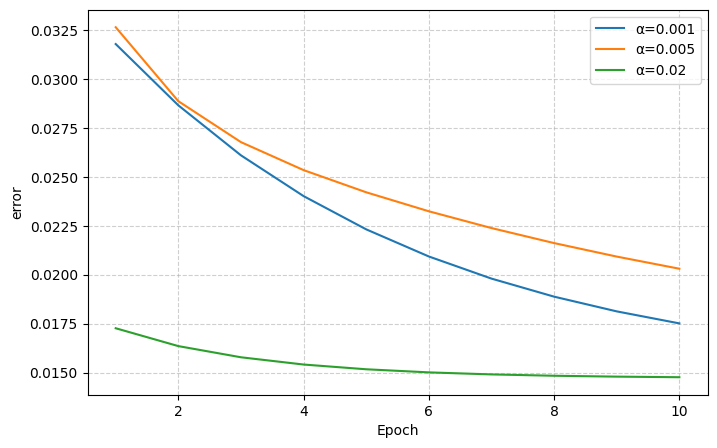

In [9]:
plotter(learning_rates, 'error', models_status, 10)

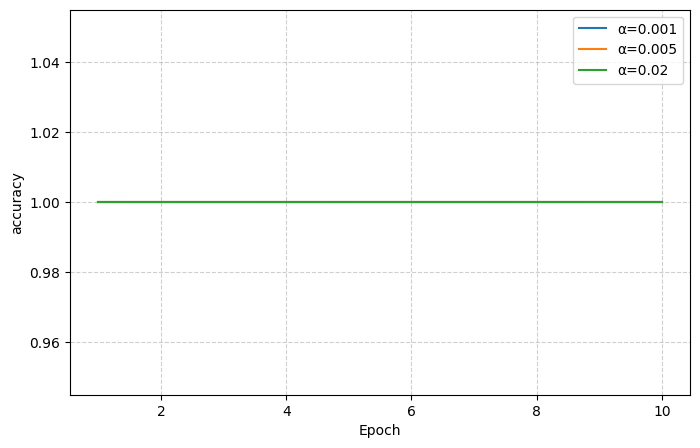

In [10]:
plotter(learning_rates, 'accuracy', models_status, 10)

# Decision Boundaries

In [19]:
def plot_decision_boundary(models, names, X, y):
    # Scatter plot of the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', marker='o', color='blue')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', marker='x', color='red')

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    x_values = np.linspace(x_min, x_max, 100)
    for id, model in enumerate(models):
      y_values = -(model.weights[0] * x_values + model.bias - 0.5) / model.weights[1]

      plt.plot(x_values, y_values, label=names[id])

    plt.ylim(y_min, y_max)
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title("Adaline Decision Boundary")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

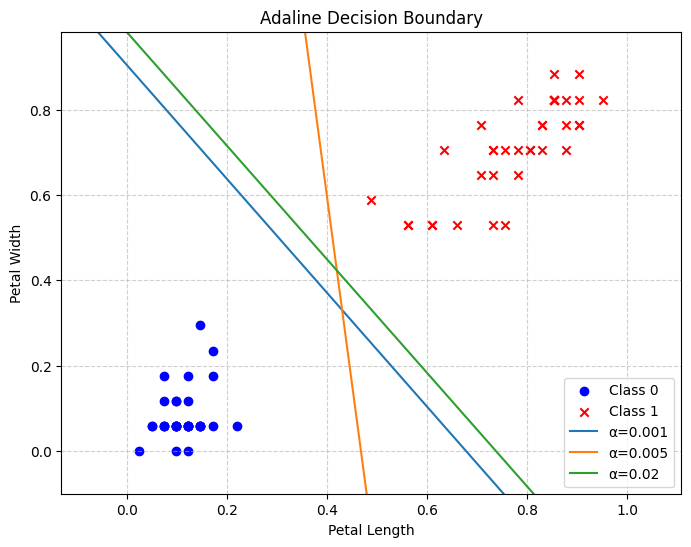

In [20]:
# on train data
plot_decision_boundary(models, ['α=0.001', 'α=0.005', 'α=0.02'], X_train, y_train)

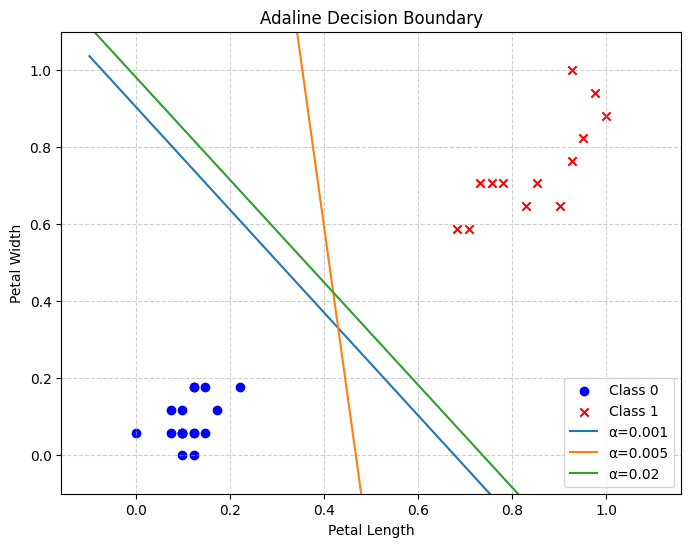

In [21]:
# on train data
plot_decision_boundary(models, ['α=0.001', 'α=0.005', 'α=0.02'], X_test, y_test)